<a href="https://colab.research.google.com/github/Lycher2/KSO/blob/main/fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import prophet
from datetime import datetime
from prophet import Prophet
from prophet.plot import plot_plotly

%matplotlib inline
warnings.filterwarnings('ignore')


Загружаем данные из txt примера

In [2]:
path = '/content/drive/MyDrive/Project_1/test.txt'
data = pd.read_csv(path, sep=",", header=None)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume']
data = data.astype({'open': np.float64,'high': np.float64, 'low': np.float64, 'close': np.float64, 'volume': np.float64})
data['normal_date'] = data['open_time'].apply(lambda x: datetime.fromtimestamp(x/1000))
data = data.reindex(columns=['normal_date','open', 'high', 'low', 'close', 'volume','open_time'])

In [3]:
data

,normal_date,open,high,low,close,volume,open_time
0,1970-01-16 23:38:15.240,122.00000,122.00000,122.00000,122.00000,0.100000,1381095240
1,1970-01-16 23:39:39.000,123.61000,123.61000,123.61000,123.61000,0.100000,1381179000
2,1970-01-16 23:40:01.080,123.91000,123.91000,123.90000,123.90000,1.991600,1381201080
3,1970-01-16 23:40:09.960,124.19000,124.19000,124.18000,124.18000,2.000000,1381209960
4,1970-01-16 23:41:51.000,124.01687,124.01687,124.01687,124.01687,1.000000,1381311000
...,...,...,...,...,...,...,...
2954378,1970-01-20 06:39:48.000,19120.00000,19120.00000,19116.60000,19119.90000,0.163557,1665588000
2954379,1970-01-20 06:39:48.060,19120.00000,19120.00000,19117.60000,19118.00000,0.475039,1665588060
2954380,1970-01-20 06:39:48.120,19118.00000,19120.00000,19118.00000,19120.00000,3.402014,1665588120
2954381,1970-01-20 06:39:48.180,19120.00000,19120.00000,19119.10000,19119.10000,0.048171,1665588180


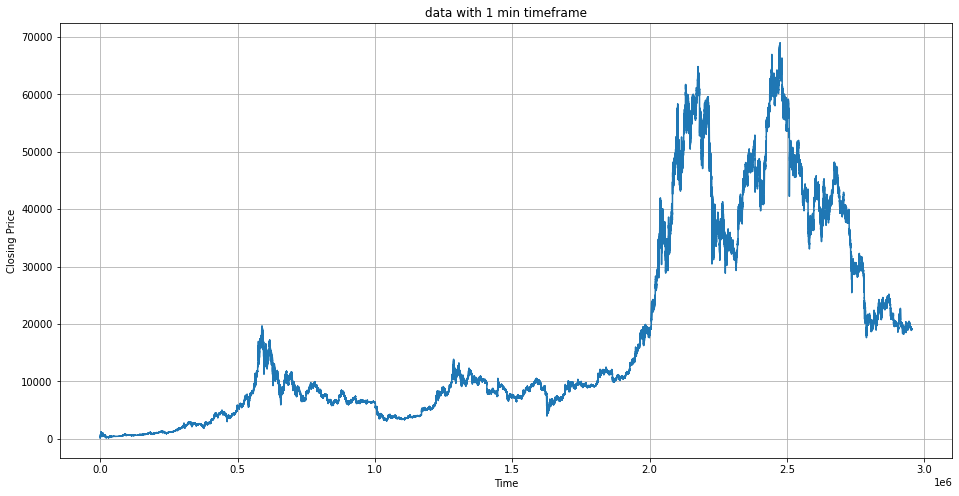

In [4]:
data['close'].plot(figsize=(16,8),title='data with 1 min timeframe',grid=True)
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

In [17]:
test = pd.DataFrame(data[['normal_date', 'close']])
test.columns = ['ds','y']
test = test.head(10_000)
test

,ds,y
0,1970-01-16 23:38:15.240,122.00000
1,1970-01-16 23:39:39.000,123.61000
2,1970-01-16 23:40:01.080,123.90000
3,1970-01-16 23:40:09.960,124.18000
4,1970-01-16 23:41:51.000,124.01687
...,...,...
9995,1970-01-17 01:55:30.360,833.43991
9996,1970-01-17 01:55:36.540,841.68759
9997,1970-01-17 01:55:36.600,833.34996
9998,1970-01-17 01:55:36.660,833.26006


In [18]:
pred = prophet.Prophet()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bz99l_x/l8t1o8qc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bz99l_x/cme5t6ag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47622', 'data', 'file=/tmp/tmp7bz99l_x/l8t1o8qc.json', 'init=/tmp/tmp7bz99l_x/cme5t6ag.json', 'output', 'file=/tmp/tmp7bz99l_x/prophet_modelmjcpt_c7/prophet_model-20221020195622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:56:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:56:23 - cmdstanpy - INFO - Chain 

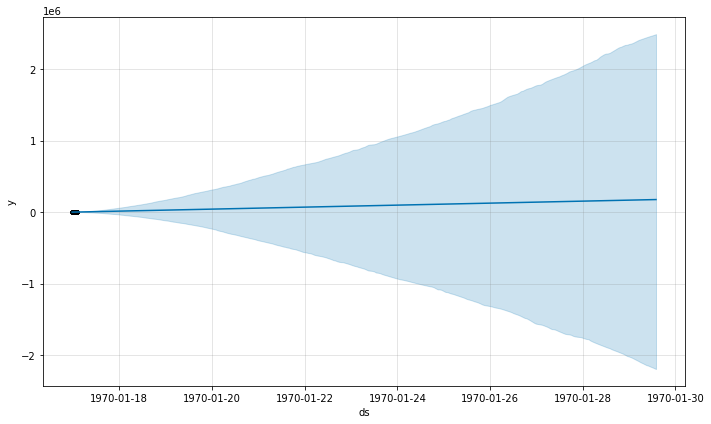

In [19]:
m = Prophet(changepoint_prior_scale=0.01).fit(test)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

In [20]:
future.tail()

,ds
10295,1970-01-29 09:55:40.800
10296,1970-01-29 10:55:40.800
10297,1970-01-29 11:55:40.800
10298,1970-01-29 12:55:40.800
10299,1970-01-29 13:55:40.800


In [21]:

fcst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10295,1970-01-29 09:55:40.800,173095.522428,-2.146242e+06,2.452502e+06,-2.146171e+06,2.452591e+06,0.0,0.0,0.0,0.0,0.0,0.0,173095.522428
10296,1970-01-29 10:55:40.800,173677.193859,-2.158492e+06,2.461237e+06,-2.158483e+06,2.461191e+06,0.0,0.0,0.0,0.0,0.0,0.0,173677.193859
10297,1970-01-29 11:55:40.800,174258.865290,-2.168974e+06,2.469100e+06,-2.168967e+06,2.469089e+06,0.0,0.0,0.0,0.0,0.0,0.0,174258.865290
10298,1970-01-29 12:55:40.800,174840.536721,-2.180934e+06,2.477864e+06,-2.180926e+06,2.477896e+06,0.0,0.0,0.0,0.0,0.0,0.0,174840.536721
10299,1970-01-29 13:55:40.800,175422.208151,-2.193861e+06,2.487701e+06,-2.193816e+06,2.487822e+06,0.0,0.0,0.0,0.0,0.0,0.0,175422.208151


In [24]:
fcst.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,10300.000000,1.030000e+04,1.030000e+04,1.030000e+04,1.030000e+04,10300.0,10300.0,10300.0,10300.0,10300.0,10300.0,10300.000000
mean,3301.423888,-2.493119e+04,3.066778e+04,-2.484806e+04,3.058474e+04,0.0,0.0,0.0,0.0,0.0,0.0,3301.423888
std,17075.109462,1.853097e+05,2.140082e+05,1.853211e+05,2.140197e+05,0.0,0.0,0.0,0.0,0.0,0.0,17075.109462
min,91.038619,-2.193861e+06,1.751065e+02,-2.193816e+06,9.103862e+01,0.0,0.0,0.0,0.0,0.0,0.0,91.038619
25%,636.373893,5.434194e+02,7.223759e+02,6.290853e+02,6.363739e+02,0.0,0.0,0.0,0.0,0.0,0.0,636.373893
50%,846.829112,7.302535e+02,9.310054e+02,8.163144e+02,8.468291e+02,0.0,0.0,0.0,0.0,0.0,0.0,846.829112
75%,896.118029,7.990606e+02,9.815064e+02,8.846307e+02,8.961180e+02,0.0,0.0,0.0,0.0,0.0,0.0,896.118029
max,175422.208151,1.141699e+03,2.487701e+06,1.141163e+03,2.487822e+06,0.0,0.0,0.0,0.0,0.0,0.0,175422.208151


In [25]:
test.describe()

,y
count,10000.000000
mean,746.600629
std,242.861274
min,122.000000
25%,650.414580
50%,782.417960
75%,919.997180
max,1198.800900
